# Exploration of the Data

In this section I explore the data set, generating statistics and visualisations.

In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# import data
raw = pd.read_csv('capstone data raw.csv')
final = pd.read_csv('capstone data final.csv', index_col=[0,1,2])
final.tail()

prev_rd_score  three_rd_av  five_rd_av  \
year round player                                                      
2017 20    Jackson Trengove            52.0    58.666667        58.2   
           Aaron Young                 68.0    51.333333        55.4   
           Tom Clurey                  47.0    42.333333        43.8   
           Angus Monfries               NaN          NaN         NaN   
           Sam Powell-Pepper           54.0    79.000000        78.8   

                              season_av  prev_against_opp  prev_at_venue  \
year round player                                                          
2017 20    Jackson Trengove   65.111111              57.0           52.0   
           Aaron Young        57.500000              23.0           68.0   
           Tom Clurey         51.611111              31.0           47.0   
           Angus Monfries           NaN              92.0           83.0   
           Sam Powell-Pepper  72.111111              68.0           54.0   

                              three_rd_av_team_for  three_rd_av_opp_against  \
year round player                                                             
2017 20    Jackson Trengove                 1577.0                   1576.0   
           Aaron Young                      1577.0                   1576.0   
           Tom Clurey                       1577.0                   1576.0   
           Angus Monfries                   1577.0                   1576.0   
           Sam Powell-Pepper                1577.0                   1576.0   

                              last_team_opp  last_team_venue  score  
year round player                                                    
2017 20    Jackson Trengove          1497.0           1491.0     32  
           Aaron Young               1497.0           1491.0     25  
           Tom Clurey                1497.0           1491.0     24  
           Angus Monfries            1497.0           1491.0     22  
           Sam Powell-Pepper         1497.0           1491.0     16

In [19]:
len(final)

33616

In [20]:
final.describe()

,prev_rd_score,three_rd_av,five_rd_av,season_av,prev_against_opp,prev_at_venue,three_rd_av_team_for,three_rd_av_opp_against,last_team_opp,last_team_venue,score
count,32569.000000,30707.000000,29122.000000,32569.000000,21061.000000,26391.000000,32428.000000,32428.000000,26884.000000,29238.000000,33616.000000
mean,72.359436,72.877850,73.153154,72.010796,73.718769,73.239513,1578.634270,1578.633767,1569.249591,1582.402558,71.760560
std,26.870460,20.844939,19.367282,19.884068,27.577479,27.504494,100.893543,95.627161,158.805832,159.807480,27.456865
min,-3.000000,4.000000,4.000000,2.000000,-3.000000,-3.000000,1254.666667,1303.000000,1132.000000,1132.000000,-3.000000
25%,53.818182,57.666667,59.000000,58.312500,54.000000,54.000000,1511.333333,1510.333333,1462.000000,1473.000000,52.000000
50%,71.000000,71.625000,72.000000,71.000000,72.000000,72.000000,1578.833333,1575.666667,1560.000000,1573.000000,70.000000
75%,90.000000,87.000000,86.400000,85.642857,92.000000,91.000000,1648.666667,1638.333333,1681.000000,1690.000000,90.000000
max,194.000000,160.000000,156.400000,180.000000,200.000000,200.000000,1928.666667,1921.000000,2033.000000,2048.000000,200.000000


In [21]:
# investigating mismatch in max value between prev_rd_score and score columns
final['score'].idxmax()

(2016, 23, 'Nick Riewoldt')

Mismatch due to score falling in final round of 2016. Prev year average rather than previous score is used for first round prev_rd_score in new year.

In [22]:
# investigating minimum value of 3 for three/five_rd_av
final['three_rd_av'].idxmin()

(2016, 15, 'Mitchell Brown')

In [23]:
raw[raw['Player']=='Mitchell Brown']

,Year,Round,Team,Player,Score,Opposition,Venue
365,2014,1,WCE,Mitchell Brown,31,WB,Domain
668,2014,2,WCE,Mitchell Brown,54,MEL,MCG
1096,2014,3,WCE,Mitchell Brown,49,STK,Domain
1512,2014,4,WCE,Mitchell Brown,48,GEE,Simonds
1959,2014,5,WCE,Mitchell Brown,26,PA,Domain
2275,2014,6,WCE,Mitchell Brown,54,CAR,Etihad
2705,2014,7,WCE,Mitchell Brown,42,FRE,Domain
2864,2014,8,WCE,Mitchell Brown,80,GWS,Domain
3546,2014,10,WCE,Mitchell Brown,27,COL,MCG
3912,2014,11,WCE,Mitchell Brown,40,NM,Domain


We can see Mitchell Brown only played 1 game in 2015 for a score of 4 points. In 2016, his previous year average would have been used to construct both his 3 and 5 year rolling averages.

In [24]:
# investigating maximum and minimum season_av values
final['season_av'].idxmin()

(2017, 20, 'Nick Larkey')

In [25]:
raw[raw['Player']=='Nick Larkey']

,Year,Round,Team,Player,Score,Opposition,Venue
32515,2017,18,NM,Nick Larkey,2,ESS,Etihad
33416,2017,20,NM,Nick Larkey,21,COL,Etihad


This value was recorded based on a single datapoint corresponding to the first game of the year for this player.

In [26]:
final['season_av'].idxmax()

(2016, 2, 'Josh J. Kennedy')

As expected, this average is based on a single score in the first round of the season.

# Exploratory Visualization

The following is the code and methodology used to produce the data visualization used for the exploratory visualization section of the capstone project

In [27]:
# split data into distinct years
tw14 = raw[raw['Year']==2014]
tw15 = raw[raw['Year']==2015]
tw16 = raw[raw['Year']==2016]
tw17 = raw[raw['Year']==2017]

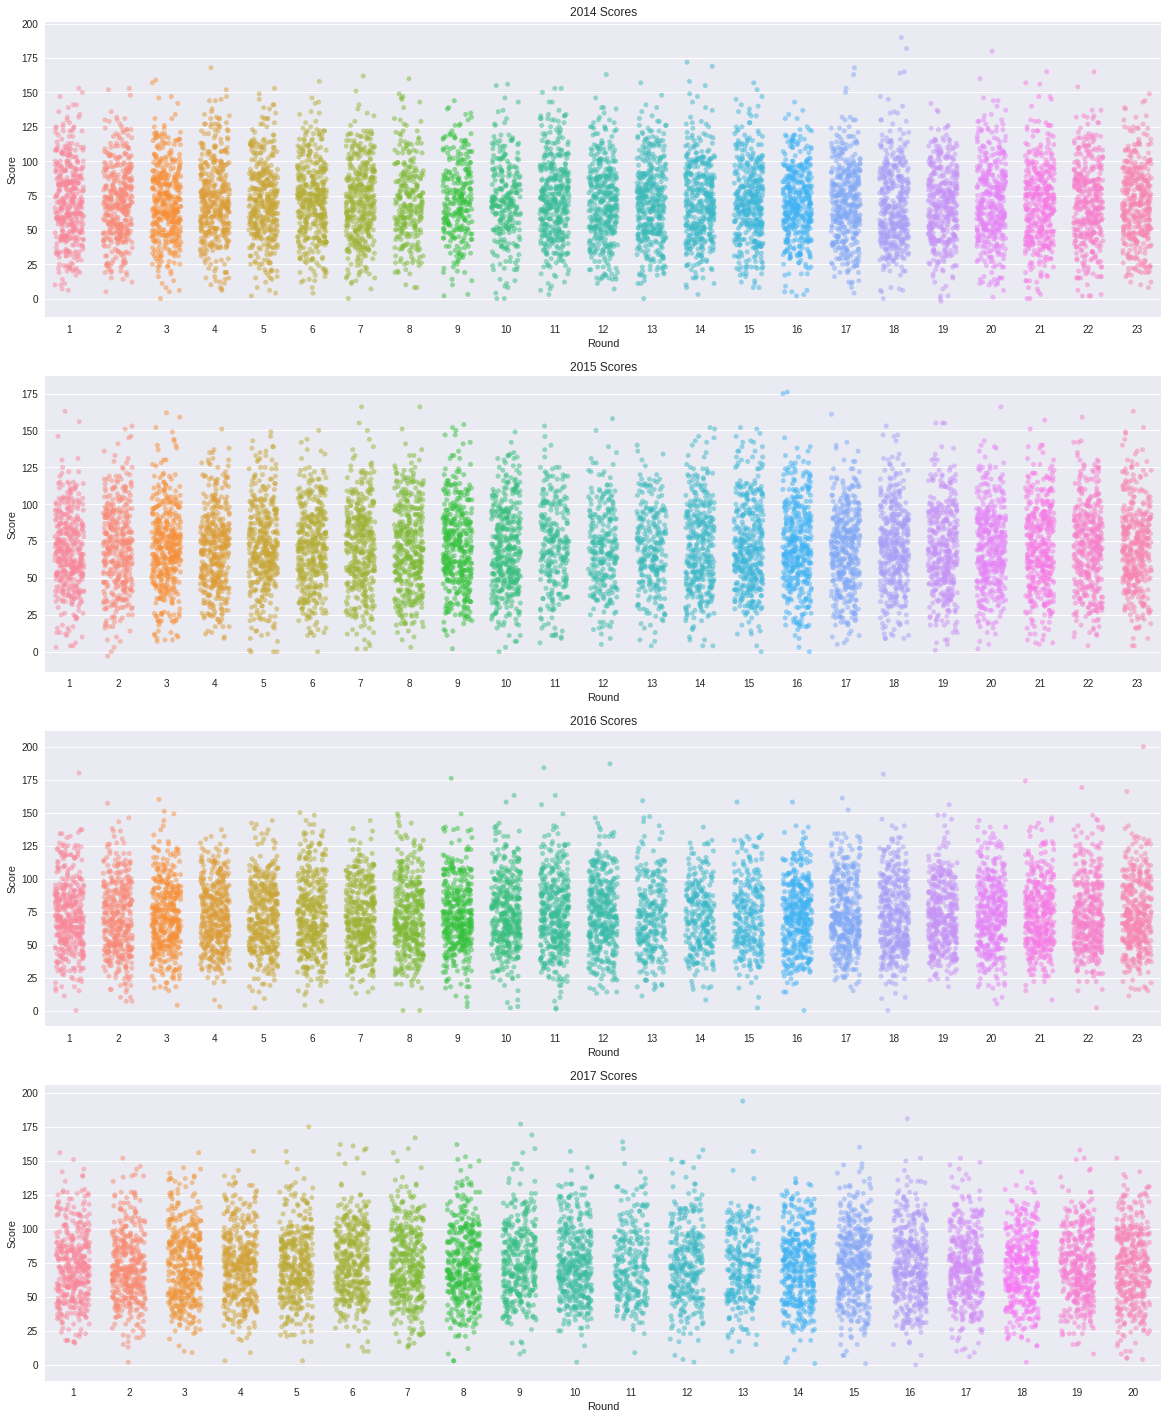

In [28]:
# create multiple plots (one for each year) that display scores vs rounds. Highlight top 5 scores each 
# round in different colour

plt.subplots(figsize=(20,25))
plt.subplot(4, 1, 1)
sns.stripplot(x=tw14['Round'], y=tw14['Score'], jitter=0.3, alpha=0.5)
plt.title('2014 Scores')
plt.subplot(4,1,2)
sns.stripplot(x=tw15['Round'], y=tw15['Score'], jitter=0.3, alpha=0.5)
plt.title('2015 Scores')
plt.subplot(4,1,3)
sns.stripplot(x=tw16['Round'], y=tw16['Score'], jitter=0.3, alpha=0.5)
plt.title('2016 Scores')
plt.subplot(4,1,4)
sns.stripplot(x=tw17['Round'], y=tw17['Score'], jitter=0.3, alpha=0.5)
plt.title('2017 Scores')